# Phase III: First ML Proof of Concept (5\%)

### Team Members:
- Annalise Cowing
- Carly Thoms
- Caroline Monaco
- Chand Duggal


In [5]:
import requests
import pandas as pd
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [3]:
API_KEY = "d7528d366d47194c2a4b5166f0a479e3"

cities = ["Minneapolis", "Boston", "San Diego", "Madison", "Washington, D.C.", "Juneau", "Des Moines", "Detroit"]

url = "https://api.openweathermap.org/data/2.5/forecast"

weather_data = []

for city in cities:
    params = {
        "q": city,
        "appid": API_KEY,
        "units": "metric"
    }
    response = requests.get(url, params=params)
    data = response.json()

    forecasts = data["list"]

    for forecast in forecasts:
        date_time = forecast["dt_txt"]
        temp = forecast["main"]["temp"]
        humidity = forecast["main"]["humidity"]
        wind_speed = forecast["wind"]["speed"]
        weather_condition = forecast["weather"][0]["main"]

        weather_data.append({"City": city, "Date": date_time, "Temperature (°C)": temp, "Humidity (%)": humidity, "Wind Speed (m/s)": wind_speed, "Weather Condition": weather_condition})

df = pd.DataFrame(weather_data)
df

,City,Date,Temperature (°C),Humidity (%),Wind Speed (m/s),Weather Condition
0,Minneapolis,2025-04-03 21:00:00,5.21,67,3.40,Clouds
1,Minneapolis,2025-04-04 00:00:00,5.21,69,2.72,Clouds
2,Minneapolis,2025-04-04 03:00:00,3.22,83,2.21,Clouds
3,Minneapolis,2025-04-04 06:00:00,1.94,84,1.68,Clouds
4,Minneapolis,2025-04-04 09:00:00,1.68,85,1.17,Clouds
...,...,...,...,...,...,...
315,Detroit,2025-04-08 06:00:00,-1.73,43,5.19,Clouds
316,Detroit,2025-04-08 09:00:00,-2.22,38,4.82,Clear
317,Detroit,2025-04-08 12:00:00,-2.42,41,4.68,Clouds
318,Detroit,2025-04-08 15:00:00,0.72,33,4.51,Clouds


## Part 1:
(2%) The implementation (using NumPy) of your first ML model as a function call to the cleaned data

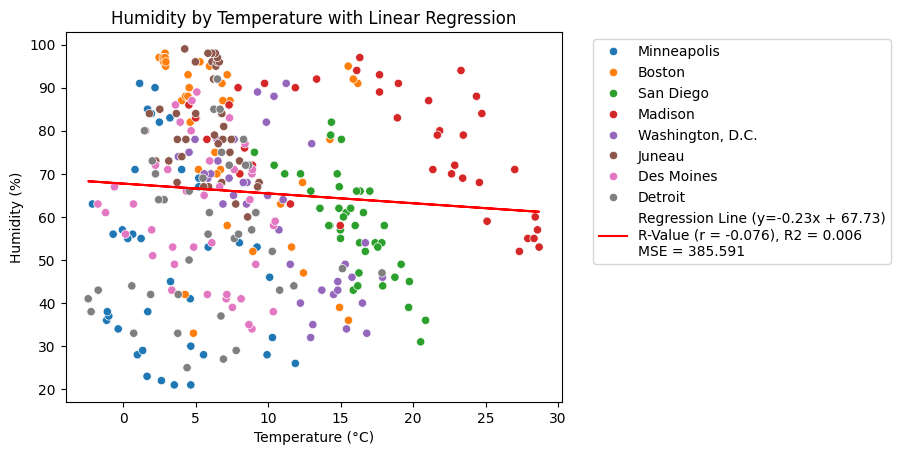

In [18]:
regression = np.polyfit(df['Temperature (°C)'], df['Humidity (%)'], 1)
regression

line = regression[0] * df['Temperature (°C)'] + regression[1]

r_value = df['Temperature (°C)'].corr(df['Humidity (%)'])
linear_r2 = r_value ** 2
mse = mean_squared_error(df['Humidity (%)'], line)

sns.scatterplot(x = 'Temperature (°C)', y = 'Humidity (%)', data = df, hue = 'City')
plt.plot(df['Temperature (°C)'], line, color = 'red', label = f'Regression Line (y={regression[0]:.2f}x + {regression[1]:.2f})\nR-Value (r = {round(r_value, 3)}), R2 = {round(linear_r2, 3)}\nMSE = {round(mse, 3)}')

plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Humidity by Temperature with Linear Regression')
plt.legend(bbox_to_anchor=(1.05, 1), loc = 'upper left')
plt.show()

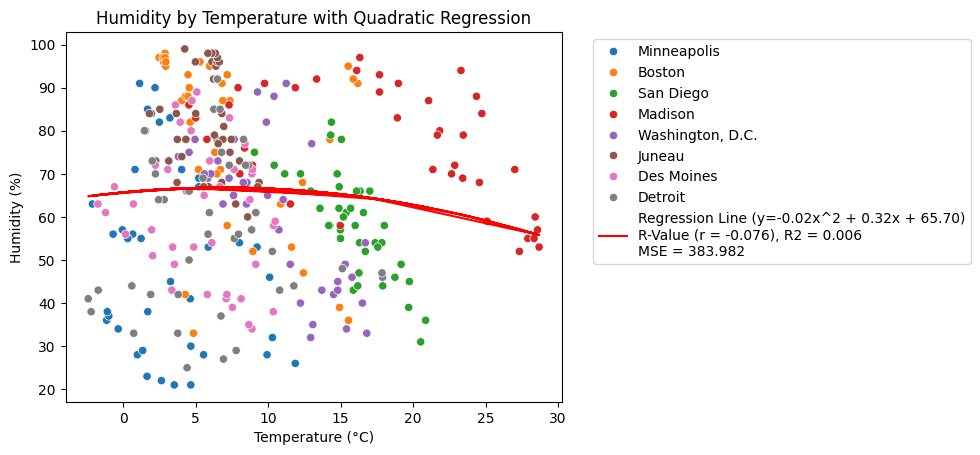

In [17]:
regression2 = np.polyfit(df['Temperature (°C)'], df['Humidity (%)'], 2)

line = (regression2[0] * df['Temperature (°C)']**2) + (regression2[1] * df['Temperature (°C)']) + regression2[2]

r_value = df['Temperature (°C)'].corr(df['Humidity (%)'])
linear_r2 = r_value ** 2
mse = mean_squared_error(df['Humidity (%)'], line)

sns.scatterplot(x = 'Temperature (°C)', y = 'Humidity (%)', data = df, hue = 'City')
plt.plot(df['Temperature (°C)'], line, color = 'red', label = f'Regression Line (y={regression2[0]:.2f}x^2 + {regression2[1]:.2f}x + {regression2[2]:.2f})\nR-Value (r = {round(r_value, 3)}), R2 = {round(linear_r2, 3)}\nMSE = {round(mse, 3)}')

plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Humidity by Temperature with Quadratic Regression')
plt.legend(bbox_to_anchor=(1.05, 1), loc = 'upper left')
plt.show()

## Part 2:
(2%) The implementation (using NumPy) of your first ML model as a function call to the cleaned data (3%) A discussion of the preliminary results:

* This may include checking of assumptions, generated plots/tables, measures of fit, or other attributes of the analysis
* It does not have to be fully correct, but as a proof of concept must demonstrate that the group is close to completing the analysis
* You must discuss some of the potential ethical considerations (or explain why there aren't any) for your project

This machine learning model was specifically meant to help answer our second key question: What is the relationship between increasing temperatures and humidity?  The line of best fit shows a close to 0 slope relationship, indicating that as temperature increases humidity does not go either up or down.  The r value of -0.076 also indicates an extremely weak correlation between the two categories, therefore indicating that the two are not closely related. Furthermore, the r-squared value is 0.006, indicating that changes in the temperature have little impact on the change in humidity. These r and r-squared values can be further confirmed by looking at the points on the graphs, where the dots appear to be randomly scattered. Both models have the same r- and r-squared values, representing the very weak association the points have with either model. For the linear regression example, the MSE is 385.591, and in the quadratic the MSE is 383.982. Both of these are very high, with the quadratic being just slightly lower. This means the quadratic fits the data a very slight bit better than the linear regression model.

There are a couple of ethical considerations to keep in mind with our dataset. The weather monitors are somewhat limited, as it can be inferred that there is only one monitor per city included in the data. This could mean that other areas of the city are underrepresented. For example, if a natural disaster were to be reported in a city, emergency assistance may not know where exactly to go. It is important to know where exactly the monitors are set up. If the monitors are in particular areas such as those which are high-income or most densely populated, this would neglect other areas. For example, say the average wind speed is much higher in an unmonitored, low-income part of the city. These winds could go unreported, meaning that people will not be warned of impending danger. If damage to homes were to occur, it may go unreported for longer, and people will have a harder time rebuilding. Similarly, there are certain indicators of dangerous weather. For instance, humidity is associated with thunderstorms. If an unmonitored area has high humidity and other indicators, the area may be under the threat of a storm and not know.

Also, there is only a sample of cities in the dataset. Naturally, this doesn't give a full picture - important findings from other cities are potentially being excluded.

There are no major privacy concerns with the dataset, as there is no personal information involved.